# Gabriel Freitas Willig
# RA: 2240289

## ICSI31 - Exercicío 1

### 1 - A Dream Airlines tem o seguinte mapa de rotas para as cidades que atende, onde cada par de cidades tem serviço em ambas as direções entre as cidades. Construa um grafo apropriado que represente esses relacionamentos utilizando o Networkx. 


In [39]:
rotas = """Albuquerque - Atlanta
Chicago - New York
Chicago - Pinhais
Curitiba - Atlanta
Curitiba - Chicago
Curitiba - Miami
Curitiba - New York
Curitiba - Sao Paulo
Londrina - Foz
Maringa - Albuquerque
Maringa - Cleveland
Miami - Denver
Miami - New York
Miami - Philadelphia
Minneapolis - Foz
New York - Cleveland
New York - Minneapolis
Philadelphia - Atlanta
Phoenix - Cleveland
Phoenix - Maringa
Pinhais - Londrina
Ponta Grossa - Cleveland
Ponta Grossa - Foz
Ponta Grossa - Londrina
Sao Paulo - Boston
Sao Paulo - Chicago
Sao Paulo - Foz
Sao Paulo - Londrina
Sao Paulo - Minneapolis
Sao Paulo - Ponta Grossa
Tulsa - Maringa
Tulsa - New York"""

rotas = rotas.splitlines()
print(rotas)

['Albuquerque - Atlanta', 'Chicago - New York', 'Chicago - Pinhais', 'Curitiba - Atlanta', 'Curitiba - Chicago', 'Curitiba - Miami', 'Curitiba - New York', 'Curitiba - Sao Paulo', 'Londrina - Foz', 'Maringa - Albuquerque', 'Maringa - Cleveland', 'Miami - Denver', 'Miami - New York', 'Miami - Philadelphia', 'Minneapolis - Foz', 'New York - Cleveland', 'New York - Minneapolis', 'Philadelphia - Atlanta', 'Phoenix - Cleveland', 'Phoenix - Maringa', 'Pinhais - Londrina', 'Ponta Grossa - Cleveland', 'Ponta Grossa - Foz', 'Ponta Grossa - Londrina', 'Sao Paulo - Boston', 'Sao Paulo - Chicago', 'Sao Paulo - Foz', 'Sao Paulo - Londrina', 'Sao Paulo - Minneapolis', 'Sao Paulo - Ponta Grossa', 'Tulsa - Maringa', 'Tulsa - New York']


In [40]:
rotas_em_tupla = [tuple(rota.split(" - ")) for rota in rotas]
print(rotas_em_tupla)

[('Albuquerque', 'Atlanta'), ('Chicago', 'New York'), ('Chicago', 'Pinhais'), ('Curitiba', 'Atlanta'), ('Curitiba', 'Chicago'), ('Curitiba', 'Miami'), ('Curitiba', 'New York'), ('Curitiba', 'Sao Paulo'), ('Londrina', 'Foz'), ('Maringa', 'Albuquerque'), ('Maringa', 'Cleveland'), ('Miami', 'Denver'), ('Miami', 'New York'), ('Miami', 'Philadelphia'), ('Minneapolis', 'Foz'), ('New York', 'Cleveland'), ('New York', 'Minneapolis'), ('Philadelphia', 'Atlanta'), ('Phoenix', 'Cleveland'), ('Phoenix', 'Maringa'), ('Pinhais', 'Londrina'), ('Ponta Grossa', 'Cleveland'), ('Ponta Grossa', 'Foz'), ('Ponta Grossa', 'Londrina'), ('Sao Paulo', 'Boston'), ('Sao Paulo', 'Chicago'), ('Sao Paulo', 'Foz'), ('Sao Paulo', 'Londrina'), ('Sao Paulo', 'Minneapolis'), ('Sao Paulo', 'Ponta Grossa'), ('Tulsa', 'Maringa'), ('Tulsa', 'New York')]


In [41]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

In [42]:
G.add_edges_from(rotas_em_tupla)

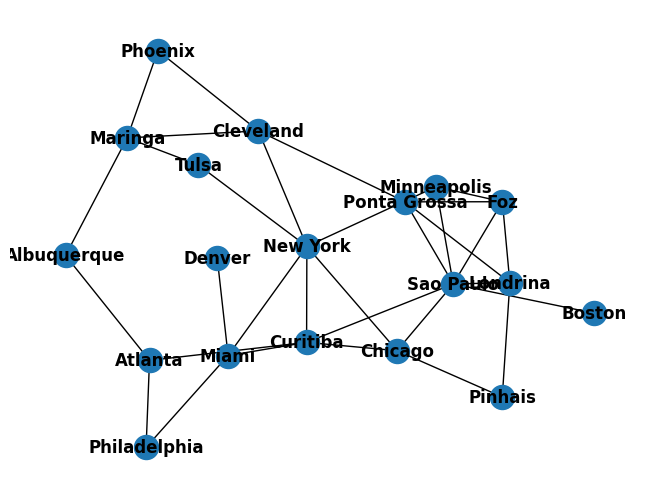

In [43]:
nx.draw(G, with_labels=True, font_weight="bold")

### 2 - Com base na rede construída no exercício 1, faça o que é proposto abaixo.

#### a) Considerando o menor número de conexões possível para chegar a qualquer destino, qual é o número maior número de conexões que um passageiro pode fazer em uma única viagem entre duas cidades atendidas? (Diâmetro)


In [44]:
diametro = nx.diameter(G)

print(f"O caminho mais curto mais longo desse grafo é: {diametro}")

O caminho mais curto mais longo desse grafo é: 4


#### b) Qual é o coeficiente de clusterização de Curitiba? E da rede geral?


In [45]:
deg = dict(G.degree())

soma = 0

for i in deg.values():
    soma += i

aver = soma / len(deg)

cidade = "Curitiba"
print("Grau médio: " + str(aver))
print("Coef. de clusterização de " + cidade + ": " + str(nx.clustering(G, cidade)))
print(
    "Coef. de clusterização do networkx (com coef de clusterização zeros): "
    + str(nx.average_clustering(G))
)
print(
    "Coef. de clusterização do networkx: "
    + str(nx.average_clustering(G, count_zeros=False))
)
# print(nx.clustering(G))
clus = dict(nx.clustering(G))

# Gephi: coeficiente de clusterização médio para nós com grau > 1
soma = 0
c = 0
for i in range(len(deg)):
    if list(deg.values())[i] > 1:
        soma += list(clus.values())[i]
        c += 1

clus_aver = soma / c

print("Coef. de clusterização do gephi (nós com grau >1): " + str(clus_aver))

Grau médio: 3.3684210526315788
Coef. de clusterização de Curitiba: 0.3
Coef. de clusterização do networkx (com coef de clusterização zeros): 0.23709273182957394
Coef. de clusterização do networkx: 0.3753968253968254
Coef. de clusterização do gephi (nós com grau >1): 0.2649859943977591


### 3- Estenda a rede criada na questão 1.
#### a) Adicione o atributo nos nós chamado Country, onde o valor se refere ao país onde cada cidade está localizada.

In [46]:
paises = {
    'Curitiba': 'Brasil',
    'Foz': 'Brasil',
    'Londrina': 'Brasil',
    'Maringa': 'Brasil',
    'Pinhais': 'Brasil',
    'Ponta Grossa': 'Brasil',
    'Sao Paulo': 'Brasil',
    'Albuquerque': 'Estados Unidos',
    'Atlanta': 'Estados Unidos',
    'Boston': 'Estados Unidos',
    'Chicago': 'Estados Unidos',
    'Cleveland': 'Estados Unidos',
    'Denver': 'Estados Unidos',
    'Miami': 'Estados Unidos',
    'Minneapolis': 'Estados Unidos',
    'New York': 'Estados Unidos',
    'Philadelphia': 'Estados Unidos',
    'Phoenix': 'Estados Unidos',
    'Tulsa': 'Estados Unidos'
}
nx.set_node_attributes(G, paises, 'Country')

#### b) Adicione o atributo nas arestas chamado Cost. Se uma aresta representa um voo internacional esse valor deve ser 5, se ela representa um voo nacional o valor deve ser 1.

In [47]:
custos = {}
for origem, destino in G.edges():
    if G.nodes[origem]['Country'] == G.nodes[destino]['Country']:
        custos[(origem, destino)] = 1  # Voo nacional
    else:
        custos[(origem, destino)] = 5  # Voo internacional

nx.set_edge_attributes(G, custos, 'Cost')

### 4 – Exporte a rede final criada na questão 3 no formato .GML. Confira se todas as informações pedidas anteriormente estão disponíveis nesse arquivo. 

In [48]:
nx.write_gml(G, f"redeDreamAirlines.gml")

In [49]:
H = nx.read_gml("redeDreamAirlines.gml")

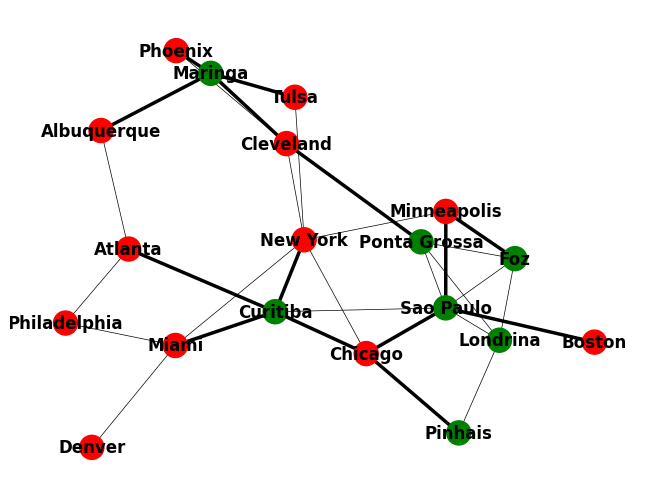

In [50]:
cores = []
for node in H.nodes():
    country = H.nodes[node].get('Country', '')
    if country == 'Estados Unidos':
        cores.append('red')
    elif country == 'Brasil':
        cores.append('green')
    else:
        cores.append('gray')

grossura = []
for u, v in H.edges():
    custo = H[u][v]['Cost']
    grossura.append(custo*0.5)

nx.draw(H, with_labels=True, node_color=cores, width=grossura, font_weight='bold')
plt.show()